# Case 4: OCR of D4BL COVID-19 Data 

Author: Sydeaka Watson in support for Data 4 Black Lives effort to monitor racial/ethnic disparities in COVID-19 cases and deaths

In this notebook, we use Optical Character Recognition (OCR) to read race/ethnicity data from COVID-19 dashboards

Reference: https://stackabuse.com/pytesseract-simple-python-optical-character-recognition/

Step 1: Install tesseract-ocr
https://github.com/tesseract-ocr/tesseract/wiki#homebrew

For MAC OS, follow instructions to install homebrew at https://brew.sh
`brew install tesseract`


Step 2: Install a few additional packages
`pip install pytesseract`
`pip install Pillow` 

In [ ]:
## Uncomment to install these packages. Only need to do this once.
#%pip install pytesseract 
#%pip install Pillow 

### Load modules

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

try:
    from PIL import Image
except ImportError:
    import Image
import pytesseract

### Load helper functions

In [2]:
def ocr_core(filename):
    """
    This function will handle the core OCR processing of images.
    """
    text = pytesseract.image_to_string(Image.open(filename))  # We'll use Pillow's Image class to open the image and pytesseract to detect the string in the image
    return text


def proc_ocr_txt(txt_raw):
    """
    This function will split OCR text output on newlines ('\n') and remove blank lines.
    """
    txt = txt_raw.split('\n')
    txt_list = [x for x in txt if x.strip(' ') != '']
    return txt_list

def display_image(image_path, fig_size=(20,10)):
    """
    This function will display image when provided a path to the image.
    """
    image = plt.imread(image_path)
    fig, ax = plt.subplots(figsize=fig_size)
    im = ax.imshow(image)
    ax.axis('off')
    #plt.imshow(image)
    plt.show()

### Get filenames

In [3]:
os.listdir('images')
file_louisiana = os.path.join('images', 'Louisiana 2020-05-14 at 7.39.02 PM.png')
file_ny_state = os.path.join('images', 'New York State 2020-05-14 at 7.39.40 PM.png')

#  Notes about data

I started working on pulling data for Louisiana and New York State (the first 2 of this type).
In the HTML for the Louisiana website, I found a link to public tableau dashboard that zooms in on the table without any headers or footers.
http://public.tableau.com/views/COVID19demog/DataonCOVIN-19RelatedDeathsToDate?:embed=y&:showVizHome=no&:host_url=https%3A%2F%2Fpublic.tableau.com%2F&:embed_code_version=3&:device=phone&:tabs=no&:toolbar=no&:showAppBanner=false&:loadOrderID=1

And the dashboard for NY State is here:
https://covid19tracker.health.ny.gov/views/NYS-COVID19-Tracker/NYSDOHCOVID-19Tracker-Fatalities?%3Aembed=yes&%3Atoolbar=no&%3Atabs=n

I started off by manually grabbing screenshots of the areas where the two tables are located. Of course we will have to use a simulated browser that can open the page and take the screenshot. I just wanted to try this as a proof of concept to see if the tools work. Here is the screenshot for Louisiana:

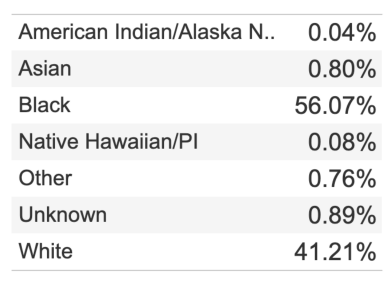

In [4]:
display_image(file_louisiana, fig_size=(10, 5))

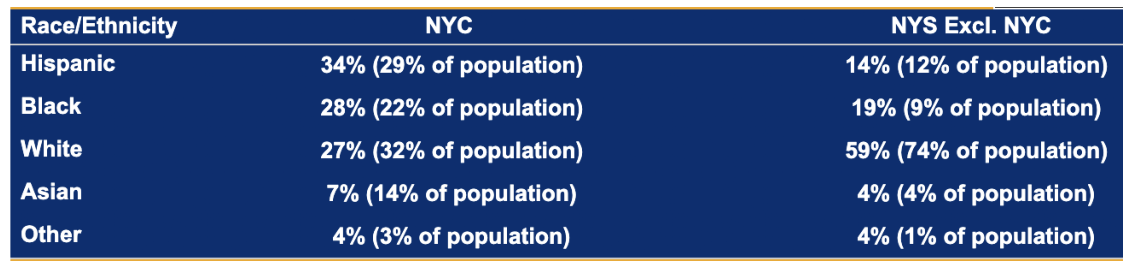

In [5]:
display_image(file_ny_state, fig_size=(20,10))

# OCR Data Extraction

## Get raw OCR output from tesseract

In [6]:
txt_la_raw = ocr_core(file_louisiana)
txt_la_raw

'American Indian/Alaska N..\n\nAsian\n\nBlack\n\nNative Hawaiian/PI\nOther\n\nUnknown\n\nWhite\n\n0.04%\n0.80%\n56.07%\n0.08%\n0.76%\n0.89%\n41.21%'

In [7]:
txt_nystate_raw = ocr_core(file_ny_state)
txt_nystate_raw

'ETUC ag\n\nNYC\n\nNYS Excl. NYC\n\n \n\n \n\nbey eel (ed\nBlack\nTics\nPCE Ti\nOther\n\n34% (29% of population)\n28% (22% of population)\n27% (32% of population)\n7% (14% of population)\n4% (3% of population)\n\n14% (12% of population)\n19% (9% of population)\n\n59% (74% of population)\n4% (4% of population)\n4% (1% of population)'

##  Split OCR text output on newlines and remove blank lines.

In [8]:
txt_la = proc_ocr_txt(txt_la_raw); txt_la

['American Indian/Alaska N..',
 'Asian',
 'Black',
 'Native Hawaiian/PI',
 'Other',
 'Unknown',
 'White',
 '0.04%',
 '0.80%',
 '56.07%',
 '0.08%',
 '0.76%',
 '0.89%',
 '41.21%']

In [9]:
txt_nystate = proc_ocr_txt(txt_nystate_raw); txt_nystate

['ETUC ag',
 'NYC',
 'NYS Excl. NYC',
 'bey eel (ed',
 'Black',
 'Tics',
 'PCE Ti',
 'Other',
 '34% (29% of population)',
 '28% (22% of population)',
 '27% (32% of population)',
 '7% (14% of population)',
 '4% (3% of population)',
 '14% (12% of population)',
 '19% (9% of population)',
 '59% (74% of population)',
 '4% (4% of population)',
 '4% (1% of population)']

## Manual effort required to map racial/ethnic groups to numeric values

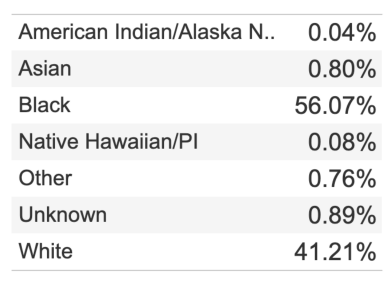

,Pct Deaths
American Indian/Alaska N..,0.04
Asian,0.80
Black,56.07
Native Hawaiian/PI,0.08
Other,0.76
Unknown,0.89
White,41.21


In [10]:
display_image(file_louisiana, fig_size=(10,5))
names_la = txt_la[0:7]
vals_la = txt_la[7:]
#{names_la[i]: float(vals_la[i].replace('%', '')) for i in range(len(names_la))}
dict_la = {names_la[i]: {'Pct Deaths': float(vals_la[i].replace('%', ''))} for i in range(len(names_la))}
pd.DataFrame(dict_la).T

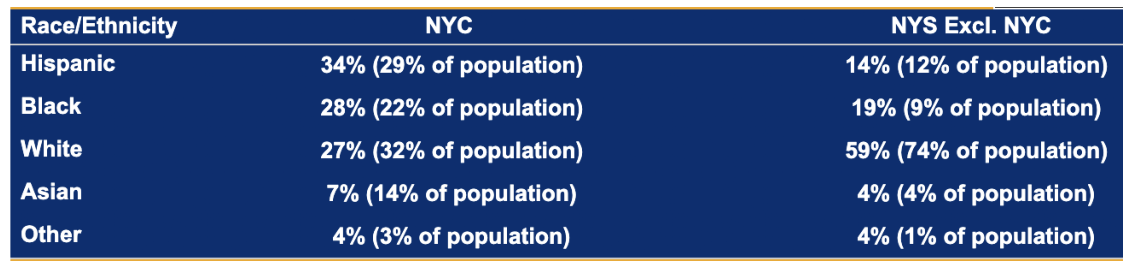

{'Hispanic': '34% 29%', 'Black': '28% 22%', 'White': '27% 32%', 'Asian': '7% 14%', 'Other': '4% 3%'}
{'Hispanic': '14% 12%', 'Black': '19% 9%', 'White': '59% 74%', 'Asian': '4% 4%', 'Other': '4% 1%'}


In [11]:
## Getting the raw outputs for cell in the table
## This case will require a separate step to split the % deaths from the % population values
display_image(file_ny_state, fig_size=(20,10))
names_nystate = ['Hispanic', 'Black', 'White', 'Asian', 'Other']
vals_nystate = [x for x in txt_nystate if 'population' in x]
nyc = {names_nystate[i]: vals_nystate[i].replace('(', '').replace(' of population)', '') for i in range(len(names_nystate))}
nys_excl_nyc = {names_nystate[i]: vals_nystate[len(names_nystate) + i].replace('(', '').replace(' of population)', '') for i in range(len(names_nystate))}

print(nyc)
print(nys_excl_nyc)

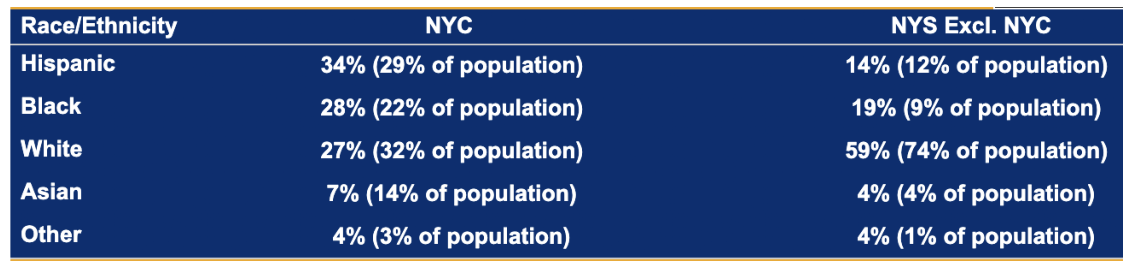

,Pct Deaths,Pct Popn
Hispanic,34,29
Black,28,22
White,27,32
Asian,7,14
Other,4,3


In [12]:
## Helper function to split out % fatalities from % population for each racial/ethnic group
def parse_nyc(nyc_dict):
    pct_deaths = {key: {'Pct Deaths': nyc_dict[key].split(' ')[0].replace('%', '')} for key in nyc_dict.keys()}
    pct_pop = {key: {'Pct Popn': nyc_dict[key].split(' ')[1].replace('%', '')} for key in nyc_dict.keys()}
    nyc_output_df = pd.DataFrame(pct_deaths).T
    nyc_output_df['Pct Popn'] = pd.DataFrame(pct_pop).T['Pct Popn']
    
    return nyc_output_df

display_image(file_ny_state, fig_size=(20,10))

## New York City Only
parse_nyc(nyc)

In [13]:
## New York State excluding New York City
parse_nyc(nys_excl_nyc)

,Pct Deaths,Pct Popn
Hispanic,14,12
Black,19,9
White,59,74
Asian,4,4
Other,4,1
